In [1]:
%load_ext autoreload
%autoreload 3
%load_ext nb_black
%load_ext dotenv
%dotenv
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>

In [6]:
import os
import ast
import json
import glob
import pathlib
import subprocess
import tempfile


root = pathlib.Path(os.environ["DATA_ROOT"]).expanduser()

<IPython.core.display.Javascript object>

In [39]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
import plotnine as p9
import pandas as pd
import scipy.stats

from ipywidgets import interact, IntSlider, widgets
from IPython.display import display

%matplotlib inline

<IPython.core.display.Javascript object>

In [15]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.

ocr = PaddleOCR(
    use_angle_cls=True, lang="en"
)  # need to run only once to download and load model into memory
img_path = "/tmp/moom/1.png"
result = ocr.ocr(img_path, cls=True)
result

[2023/05/13 10:32:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/mike/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/mike/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

[[[[[1132.0, 283.0], [1481.0, 299.0], [1478.0, 360.0], [1129.0, 345.0]],
   ('ROGUE', 0.9936224222183228)],
  [[[1108.0, 362.0], [1219.0, 370.0], [1216.0, 412.0], [1105.0, 404.0]],
   ('[NTERVALS', 0.9312094449996948)],
  [[[1006.0, 413.0], [1056.0, 413.0], [1056.0, 435.0], [1006.0, 435.0]],
   ('START', 0.995783805847168)],
  [[[1530.0, 466.0], [1575.0, 471.0], [1572.0, 493.0], [1527.0, 488.0]],
   ('10/20', 0.9903608560562134)],
  [[[1103.0, 500.0], [1159.0, 505.0], [1157.0, 527.0], [1101.0, 521.0]],
   ('SPEED', 0.9950237274169922)],
  [[[1166.0, 503.0], [1203.0, 509.0], [1199.0, 533.0], [1162.0, 527.0]],
   ('MPH', 0.9726397395133972)],
  [[[1260.0, 508.0], [1323.0, 513.0], [1320.0, 541.0], [1257.0, 535.0]],
   ('WATTS', 0.9913333058357239)],
  [[[1395.0, 516.0], [1473.0, 521.0], [1471.0, 549.0], [1393.0, 543.0]],
   ('CADENCE', 0.9954140782356262)],
  [[[1272.0, 540.0], [1322.0, 540.0], [1322.0, 584.0], [1272.0, 584.0]],
   ('12', 0.8155999183654785)],
  [[[1414.0, 546.0], [1478.0

<IPython.core.display.Javascript object>

In [30]:
df = pd.DataFrame(result[0], columns=["bbox", "inference"])
df[["inference_text", "inference_score"]] = pd.DataFrame(
    df["inference"].tolist(), index=df.index
)

df = df.drop(columns="inference")  # .set_index("inference_text")

df

,bbox,inference_text,inference_score
0,"[[1132.0, 283.0], [1481.0, 299.0], [1478.0, 36...",ROGUE,0.993622
1,"[[1108.0, 362.0], [1219.0, 370.0], [1216.0, 41...",[NTERVALS,0.931209
2,"[[1006.0, 413.0], [1056.0, 413.0], [1056.0, 43...",START,0.995784
3,"[[1530.0, 466.0], [1575.0, 471.0], [1572.0, 49...",10/20,0.990361
4,"[[1103.0, 500.0], [1159.0, 505.0], [1157.0, 52...",SPEED,0.995024
5,"[[1166.0, 503.0], [1203.0, 509.0], [1199.0, 53...",MPH,0.972640
6,"[[1260.0, 508.0], [1323.0, 513.0], [1320.0, 54...",WATTS,0.991333
7,"[[1395.0, 516.0], [1473.0, 521.0], [1471.0, 54...",CADENCE,0.995414
8,"[[1272.0, 540.0], [1322.0, 540.0], [1322.0, 58...",12,0.815600
9,"[[1414.0, 546.0], [1478.0, 546.0], [1478.0, 60...",9h,0.971680


<IPython.core.display.Javascript object>

In [123]:
def bbox_angle(bbox):
    df = pd.DataFrame(bbox, columns=["x", "y"])
    slope, *_ = scipy.stats.linregress(df.x, df.y)
    angle_radians = np.arctan(slope)
    angle_degrees = np.degrees(angle_radians)

    return angle_degrees


markers = {"SPEED", "WATTS", "CADENCE", "CALORIES", "TARGETS", "DISTANCE"}
df.query("inference_text in @markers").query("inference_score >= 0.98").assign(
    angle=lambda f: f.bbox.apply(bbox_angle)
).angle.median()

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

markers = {"SPEED", "WATTS", "CADENCE", "CALORIES", "TARGETS", "DISTANCE"}


def best_match(text):
    # calculate the best match out of the possible markers
    best = process.extractOne(text, markers)
    return best[1] if best else 0

def make_polygons_2d(polygons):
    return np.concatenate(polygons).reshape(-1, 2).astype(np.float32)



def super_bounding_box(xy):
    xx, yy = xy[:, 0], xy[:, 1]

    return [xx.min(), xx.max(), yy.min(), yy.max()]


def process_group(group):
    landmarks = (
        group.assign(match_score=group["inference_text"].apply(best_match))
        .query("match_score >= 90")
        .query("inference_score >= 0.98")
        .assign(angle=lambda f: f.bbox.apply(bbox_angle))
    )
    a = make_polygons_2d(landmarks.bbox.to_numpy())

    return {"angle": landmarks.angle.median(),
                         "resize_width": 1000,
"bbox": super_bounding_box(a)}




dfc = df.assign(frame="f1")
dfc2 = dfc.assign(frame="f2")
dfm= pd.concat([dfc, dfc2]).reset_index(drop=True)

records = []
for fg, sdf in dfm.groupby('frame'):
    records.append( dict(frame=fg) | process_group(sdf) )
pd.DataFrame.from_records(records)



4.339950413567229

,frame,angle,resize_width,bbox
0,f1,4.33995,1000,"[1089.0, 1473.0, 500.0, 670.0]"
1,f2,4.33995,1000,"[1089.0, 1473.0, 500.0, 670.0]"


<IPython.core.display.Javascript object>

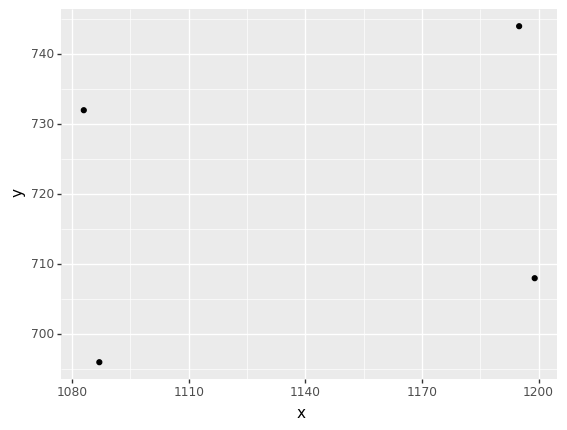

<ggplot: (8773110326903)>

<IPython.core.display.Javascript object>

In [29]:
_df = pd.DataFrame(df.loc["HEARTRATE"].bbox, columns=["x", "y"])

p9.ggplot(_df, p9.aes("x", "y")) + p9.geom_point()

In [70]:
import ipywidgets as widgets
from PIL import Image
import io
import IPython.display as display
import numpy as np
from PIL import Image
import ipywidgets as widgets


# Load an image
img = Image.open('/tmp/moom/1.png')



# Create a function to display the image
def display_image(img):
    # Convert image to byte array
    byte_arr = io.BytesIO()
    img.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    
    # Display the image
    display.display(display.Image(byte_arr))

# # Create a function to process the image
# def process_image(crop_range_x, crop_range_y, rotation):
#     # Crop the image
#     cropped_img = img.crop((crop_range_x[0], crop_range_y[0], crop_range_x[1], crop_range_y[1]))
    
#     # Rotate the image
#     rotated_img = cropped_img.rotate(rotation)
    
#     # Display the processed image
#     display_image(rotated_img)

# # Use interactive widget
# widgets.interactive(process_image, crop_range_x=crop_x_widget, crop_range_y=crop_y_widget, rotation=rotate_widget)



def interactive_image_processing(image_path):
    img = Image.open(image_path)

    @widgets.interact
    def process_image(
crop_x_widget = widgets.IntRangeSlider(
    value=[1050, 1500], 
    min=0, 
    max=img.size[0], 
    step=1, 
    description='Crop Range X:', 
    continuous_update=False
),

# Define the widget for cropping along Y dimension
crop_y_widget = widgets.IntRangeSlider(
    value=[360, 770], 
    min=0, 
    max=img.size[1], 
    step=1, 
    description='Crop Range Y:', 
    continuous_update=False
),

resize_width=widgets.IntSlider(min=100, max=img.width, step=10, value=600, continuous_update=False),
        
# Define the widget for rotation
rotation = widgets.FloatSlider(
    value=0, 
    min=-5, 
    max=5, 
    step=0.1, 
    description='Rotation:', 
    continuous_update=False
),
                     ):
        crop_left, crop_right = crop_x_widget
        crop_top, crop_bottom = crop_y_widget
        cropped_img = img.crop((crop_left, crop_top, crop_right, crop_bottom))
        resize_height = int(cropped_img.height * (resize_width / cropped_img.width))
        resized_img = cropped_img.resize((resize_width, resize_height), Image.LANCZOS)
        rotated_img = resized_img.rotate(rotation, Image.BICUBIC)
        display_image(rotated_img)

interactive_image_processing('/tmp/moom/1.png')



interactive(children=(IntRangeSlider(value=(1050, 1500), continuous_update=False, description='Crop Range X:',…

<IPython.core.display.Javascript object>

In [ ]:
def run_ssocr(image, params, commands):
    # Define the command and parameters
    cmd = ["./ssocr-2.22.2/ssocr"]

    # Add the parameters to the command
    for key, value in params.items():
        if value is None:
            cmd.append(f"--{key}")
        else:
            cmd.append(f"--{key}={value}")

    for _cmd in commands:
        cmd.extend(_cmd.split())

    # If the input is a numpy array, write it to a temporary file
    if isinstance(image, str):
        cmd.append(image)
    else:
        # Create a temporary file
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        temp_file_path = temp_file.name
        # Write the image to the temporary file
        cv2.imwrite(temp_file_path, image)
        cmd.append(temp_file_path)

    # print(f"{cmd=}")

    # Run the command and get the output
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Delete the temporary file if it was used
    if not isinstance(image, str):
        os.remove(temp_file_path)

    # Check for errors
    if result.stderr:
        print(f"Error: {result.stderr.decode()}")

    # Return the output
    return result.stdout.decode().strip()


def text_table(xs, ncol=8, width=5):
    out = []
    while True:
        this_row = xs[:ncol]
        line = "".join(f"{e:>{width}}" for e in this_row)
        out.append(line)
        xs = xs[ncol:]
        if not xs:
            break

    return "\n".join(out)

In [142]:
def rollmin(s):
    return (
        s.rolling(10, center=True).min().fillna(method="bfill").fillna(method="ffill")
    )


def rollmax(s):
    return (
        s.rolling(10, center=True).max().fillna(method="bfill").fillna(method="ffill")
    )


df = pd.DataFrame(dict(x=range(30))).sample(frac=1)

df.assign(y=lambda f: rollmax(f.x), z=lambda f: rollmin(f.x))

,x,y,z
1,1,27.0,1.0
26,26,27.0,1.0
7,7,27.0,1.0
15,15,27.0,1.0
23,23,27.0,1.0
10,10,27.0,1.0
27,27,27.0,7.0
22,22,27.0,3.0
8,8,27.0,3.0
24,24,27.0,3.0


<IPython.core.display.Javascript object>

In [253]:
def best_match_2(text):
    markers = {
        "SPEED",
        "WATTS",
        "CADENCE",
        "CALORIES",
        "TARGETS",
        "DISTANCE",
        "MPH",
        "MI",
        "HEARTRATE",
        "TIME",
    }

    # calculate the best match out of the possible markers
    best = process.extractOne(text, markers, score_cutoff=90)
    if best is None:
        return ""
    return best[0]



def compute_distance(bbox1, bbox2):

    # Compute centers of mass
    center1 = bbox1.mean(axis=0)
    center2 = bbox2.mean(axis=0)

    # Compute Euclidean distance between centers
    distance = np.linalg.norm(center1 - center2)

    return distance


def compute_angle(bbox1, bbox2):
    # Compute centers of mass
    center1 = bbox1.mean(axis=0)
    center2 = bbox2.mean(axis=0)

    # Compute angle relative to bbox1
    diff = center2 - center1
    angle = math.atan2(diff[1], diff[0]) * 180 / math.pi

    return angle


def process_group_2(group):
    landmarks = group.assign(inference_clean=group["inference_text"].apply(best_match_2))

    markers = {
        "SPEED",
        "WATTS",
        "CADENCE",
        "CALORIES",
        "DISTANCE",
        "TIME",
    }
    candidate_numbers = landmarks.query("inference_clean.str.len() == 0").assign(
        bbox=lambda f: [np.array(json.loads(e)) for e in f.bbox]
    ).reset_index(drop=True).assign(box_id=lambda f: range(len(f)))

    out = []
    for marker in markers:
        rec = landmarks.query("inference_clean == @marker").squeeze()
        if not isinstance(rec.bbox, str):
            continue
        ref_bbox = np.array(json.loads(rec.bbox))

        _df = candidate_numbers.assign(distance_from_ref=lambda f: [compute_distance(ref_bbox, e)
                                                                  for e in f.bbox],
                                      angle_from_ref=lambda f: [compute_angle(ref_bbox, e)
                                                                  for e in f.bbox]
                                      ).assign(belowness_score=lambda f: f.distance_from_ref + abs(f.angle_from_ref - 90)).sort_values("belowness_score")

        out.append(_df.head(1).assign(marker=marker))
            
    return pd.concat(out).loc[:, ["marker", "inference_text", "inference_score", "belowness_score", "box_id"]]


df = (
    pd.read_csv("phase2.csv")
    .assign(frame=lambda f: [os.path.basename(e) for e in f.frame])
)


df = (df.groupby("frame").apply(process_group_2)
 .reset_index().drop(columns="level_1")
 .sort_values(["frame", "box_id", "belowness_score"])
 .assign(
     is_duplicate=lambda f: f.duplicated(["frame", "box_id"], keep="first"),
 )
)

df.loc[df.is_duplicate, ["inference_text", "inference_score"]] = np.nan

df.query("marker == 'DISTANCE'").inference_text.unique()

[2023-05-13 14:50:43,457] [ WARNING] process.py:81 - Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '-']


array(['0.03', 'E00', '600', '0.04', 'HO0', '6O0', 'HOO', nan, 'H00',
       '0.04.', '0.04.1', '0.041'], dtype=object)

<IPython.core.display.Javascript object>

In [188]:
x = np.array([[434.0, 317.0], [531.0, 320.0], [529.0, 367.0], [433.0, 364.0]])
x.mean(axis=0)

array([481.75, 342.  ])

<IPython.core.display.Javascript object>

In [ ]:
images = sorted(glob.glob("/tmp/tmpnzivpd0q/cutouts/watts*.png"))


# Create widgets for the parameters
threshold_widget = widgets.IntSlider(min=0, max=100, step=1, value=50, description='Threshold')
number_digits_widget = widgets.IntSlider(min=-1, max=6, step=1, value=-1, description='Number of Digits')
white_border_widget = widgets.IntSlider(min=0, max=10, step=1, value=0, description='White Border')


def update_and_run(threshold, number_digits, white_border):
    # Update the parameters
    params = {
    "threshold": threshold,
    'number-digits': number_digits
    }

    commands = [
        (f"white_border {white_border}" if (white_border > 0) else ""),
    ]

    results = [run_ssocr(image, params, commands) for image in images]
    print(text_table(results))


# Interactive widget with all parameters
widgets.interact(
    update_and_run,
    threshold=threshold_widget,
    number_digits=number_digits_widget,
    white_border=white_border_widget,
)


In [ ]:

images = sorted(glob.glob("/tmp/tmpnzivpd0q/cutouts/watts*.png"))


# Additional parameters
params = {
    'threshold': 50,
    'number-digits': -1,
    'foreground': 'black',
    'background': 'white',
    'iter-threshold': False,
    'number-pixels': 0,
    'ignore-pixels': 0,
    'one-ratio': 1.0,
    'minus-ratio': 1.0,
    'dec-h-ratio': 1.0,
    'dec-w-ratio': 1.0,
    'process-only': False,
    'print-info': False,
    'adjust-gray': False,
    'luminance': 'default',
    'print-spaces': False,
    'space-factor': 1.0,
    'space-average': False,
    'ascii-art-segments': False,
    'print-as-hex': False,
    'omit-decimal-point': False,
    'charset': 'default',
}

# Create widgets for the parameters
threshold_widget = widgets.IntSlider(min=0, max=100, step=1, value=params['threshold'], description='Threshold')
number_digits_widget = widgets.IntSlider(min=-1, max=6, step=1, value=params['number-digits'], description='Number of Digits')
foreground_widget = widgets.Dropdown(options=['black', 'white'], value=params['foreground'], description='Foreground')
background_widget = widgets.Dropdown(options=['black', 'white'], value=params['background'], description='Background')

def text_table(xs, ncol=8, width=5):
    out = []
    while True:
        this_row = xs[:ncol]
        line = "".join(f"{e:>{width}}" for e in this_row)
        out.append(line)
        xs = xs[ncol:]
        if not xs:
            break
    
    return "\n".join(out)

def update_and_run(threshold, number_digits, white_border):
    # Update the parameters
    params = {
    "threshold": threshold,
    'number-digits': number_digits
    }

    commands = [
        (f"white_border {white_border}" if (white_border > 0) else ""),
    ]
    
    # Run the ssocr function
#     return pd.DataFrame(
#         dict(
#             image=[os.path.basename(e) for e in cadence_images],
#             result = [run_ssocr(image, params, commands) for image in cadence_images],))
    results = [run_ssocr(image, params, commands) for image in images]
    print(text_table(results))



# Create widgets for the additional parameters
iter_threshold_widget = widgets.Checkbox(value=params['iter-threshold'], description='Iterative Threshold')
number_pixels_widget = widgets.IntSlider(min=0, max=100, step=1, value=params['number-pixels'], description='Number of Pixels')
ignore_pixels_widget = widgets.IntSlider(min=0, max=100, step=1, value=params['ignore-pixels'], description='Ignore Pixels')
one_ratio_widget = widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=params['one-ratio'], description='One Ratio')
minus_ratio_widget = widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=params['minus-ratio'], description='Minus Ratio')
dec_h_ratio_widget = widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=params['dec-h-ratio'], description='Dec H Ratio')
dec_w_ratio_widget = widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=params['dec-w-ratio'], description='Dec W Ratio')
process_only_widget = widgets.Checkbox(value=params['process-only'], description='Process Only')
print_info_widget = widgets.Checkbox(value=params['print-info'], description='Print Info')
adjust_gray_widget = widgets.Checkbox(value=params['adjust-gray'], description='Adjust Gray')
luminance_widget = widgets.Text(value=params['luminance'], description='Luminance')
print_spaces_widget = widgets.Checkbox(value=params['print-spaces'], description='Print Spaces')
space_factor_widget = widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=params['space-factor'], description='Space Factor')
space_average_widget = widgets.Checkbox(value=params['space-average'], description='Space Average')
ascii_art_segments_widget = widgets.Checkbox(value=params['ascii-art-segments'], description='ASCII Art Segments')
print_as_hex_widget = widgets.Checkbox(value=params['print-as-hex'], description='Print as Hex')
omit_decimal_point_widget = widgets.Checkbox(value=params['omit-decimal-point'], description='Omit Decimal Point')
charset_widget = widgets.Text(value=params['charset'], description='Charset')
white_border_widget = widgets.IntSlider(min=0, max=10, step=1, value=0, description='White Border')

# Interactive widget with all parameters
widgets.interact(
    update_and_run,
    threshold=threshold_widget,
    number_digits=number_digits_widget,
    white_border=white_border_widget,
)


In [ ]:
images

In [ ]:
4

In [ ]:
[e for e in dir(cv2) if "OTSU" in e]

In [ ]:
pimg = crop_to_content(img)
plt.imshow(pimg)

In [ ]:
def preprocess_image(image, blur_kernel_size, dilation_size, edge_size):
    # 1. Blurring
    image = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 0)
    
    # 2. Thresholding
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # 3. Dilation
    kernel = np.ones((dilation_size, dilation_size), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    
    # 4. Edge removal
    image[edge_size:-edge_size, edge_size:-edge_size] = 255

    return image

def interactive_preprocessing(image):
    interact(lambda blur_kernel_size, dilation_size, edge_size: plt.imshow(preprocess_image(image, blur_kernel_size, dilation_size, edge_size), cmap='gray'),
             blur_kernel_size=IntSlider(min=1, max=11, step=2, value=3),
             dilation_size=IntSlider(min=1, max=11, step=2, value=3),
             edge_size=IntSlider(min=0, max=50, step=1, value=0))

# Example usage:
# img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
interactive_preprocessing(((1-pimg)*255).astype(np.uint8))


In [ ]:
def run_length_score(binary_image):
    pixel_counts = dict(zip(*np.unique(im1.ravel(), return_counts=True)))
    assert len(pixel_counts)<=2, "Should be a binary image."
    
    def row_run_lengths(row):
        return np.sum(row * (row >= np.roll(row, 1)))

    def column_run_lengths(col):
        return np.sum(col * (col >= np.roll(col, 1)))

    row_scores = np.apply_along_axis(row_run_lengths, 1, binary_image)
    col_scores = np.apply_along_axis(column_run_lengths, 0, binary_image)

    return np.sum(row_scores) + np.sum(col_scores)

def rotate_image(image, angle, border_value=0):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows), borderValue=border_value)
    return rotated_image

def straighten_image_maximize_run_length(binary_image, angle_range=(-10, 10), num_angles=100):
    best_score = -1
    best_angle = 0

    angles = np.linspace(angle_range[0], angle_range[1], num_angles)

    for angle in angles:
        rotated_image = rotate_image(binary_image, angle)
        score = run_length_score(rotated_image)
        
        if score > best_score:
            best_score = score
            best_angle = angle

    # Apply the best rotation angle to the image
    straightened_image = rotate_image(binary_image, best_angle)

    return straightened_image


In [ ]:
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks


def correct_rotation(image):
    edges = cv2.Canny(image, 50, 150)
    hspace, angles, distances = hough_line(edges)

    _, _, angles = hough_line_peaks(hspace, angles, distances)
    mean_angle = np.mean(angles)

    rotation_angle = np.rad2deg(mean_angle) % 180
    if rotation_angle > 90:
        rotation_angle -= 180

    print(f"{rotation_angle=}")

    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    rotated_image = cv2.warpAffine(
        image, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_REPLICATE
    )

    return rotated_image


def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(
        image, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_REPLICATE
    )
    return rotated_image


def correct_rotation(image, angle_range=(-10, 10), num_angles=100):
    best_score = float("inf")
    best_angle = 0

    angles = np.linspace(angle_range[0], angle_range[1], num_angles)

    for angle in angles:
        rotated_image = rotate_image(image, angle)
        moments = cv2.moments(rotated_image)
        score = moments["mu02"] + moments["mu20"]

        if score < best_score:
            best_score = score
            best_angle = angle

    print(f"{best_angle=}")

    corrected_image = rotate_image(image, best_angle)
    return corrected_image


def correct_rotation(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    angles = []
    for contour in contours:
        _, _, w, h = cv2.boundingRect(contour)
        if w > 0 and h > 0:
            aspect_ratio = float(w) / h
            if 0.2 < aspect_ratio < 0.8:
                _, (w, h), angle = cv2.minAreaRect(contour)
                if w < h:
                    angle += 90
                angles.append(angle)

    if not angles:
        return image

    median_angle = np.median(angles)
    corrected_image = rotate_image(image, median_angle)
    return corrected_image


def correct_rotation(image, angle_range=(-10, 10)):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    angles = []
    for contour in contours:
        print(contour)
        _, _, w, h = cv2.boundingRect(contour)
        if w > 0 and h > 0:
            aspect_ratio = float(w) / h
            if 0.2 < aspect_ratio < 0.8:
                _, (w, h), angle = cv2.minAreaRect(contour)
                if w < h:
                    angle += 90
                angles.append(angle)

    if not angles:
        return image

    median_angle = np.median(angles)

    # Limit the rotation angle to the specified range
    median_angle = max(angle_range[0], min(median_angle, angle_range[1]))

    corrected_image = rotate_image(image, median_angle)
    return corrected_image


def preprocess_seven_segment_image(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(
        grayscale_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    rotated_image = correct_rotation(binary_image)
    # rotated_image = binary_image

    # kernel = np.ones((2, 2), np.uint8)
    # cleaned_image = cv2.morphologyEx(rotated_image, cv2.MORPH_CLOSE, kernel)
    cleaned_image = rotated_image

    return cleaned_image


# Example usage:
image_path = "test-number.png"
preprocessed_image = preprocess_seven_segment_image(image_path)
plt.imshow(preprocessed_image)

In [ ]:
!ls /tmp/tmpnzivpd0q/cutouts/speed*.png

In [ ]:
im1, im2 = ocr.process_image("test-number.png")

In [ ]:
np.unique(rotate_image(im1, 1).ravel())

In [ ]:
plt.imshow(im2)

In [ ]:
def load_image(image_path):
    # Load the image
    # image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(str(image_path), cv2.IMREAD_COLOR)
    return np.fliplr(np.flipud(image))


def deskew_image(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply a binary threshold
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Get the coordinates of the non-zero pixels
    coords = np.column_stack(np.where(thresh > 0))

    # Compute the minimum rotated bounding box
    angle = cv2.minAreaRect(coords)[-1]
    print(f"{angle=}")

    # Correct the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Get the image size
    (h, w) = gray.shape[:2]

    # Calculate the center of the image
    center = (w // 2, h // 2)

    # Rotate the image using the computed angle
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(
        gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE
    )

    return rotated


def preprocess_image(image):
    # Resize the image
    scale_percent = 150
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

    # Apply binary thresholding
    _, thresholded = cv2.threshold(
        resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
    )

    # Apply morphological operations
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    # Remove noise
    denoised = cv2.fastNlMeansDenoising(
        closing, h=20, templateWindowSize=7, searchWindowSize=21
    )

    return denoised


def segment_image(image, k=3):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Convert to floating-point
    pixels = np.float32(pixels)

    # Define the criteria and apply k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    _, labels, centers = cv2.kmeans(
        pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # Convert back to 8-bit values
    centers = np.uint8(centers)

    # Map the segmented image
    segmented_image = centers[labels.flatten()]

    # Reshape the image to its original dimensions
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

In [ ]:
# p9.ggplot(pd.DataFrame(dict(x=np.ravel(img))), p9.aes(x="x")) + p9.geom_histogram()

In [ ]:
plt.rcParams["figure.figsize"] = (6, 12)
img = load_image(root / "0117.png")
img = img[900:-400, :, :]
plt.imshow(img)

plt.imshow(segment_image(img, k=10))
# plt.imshow(img)

# plt.imshow(deskew_image(img))

# plt.imshow(np.where(img < 100, img, 255))


# (img, dpi=600)

In [ ]:
from pytesseract import pytesseract

# Set the path to the Tesseract executable
pytesseract.tesseract_cmd = r'/path/to/tesseract'

# Preprocess the image
image_path = 'path/to/your/image.jpg'
preprocessed_image = preprocess_image(image_path)

# Run Tesseract OCR on the preprocessed image
text = pytesseract.image_to_string(preprocessed_image)
print(text)
